### 必要モジュールのインポート

In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import cv2
import random
import kwcoco, kwplot
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from mpl_toolkits.axes_grid1 import ImageGrid

# 1枚の画像を表示する関数
def show_img(img, dpi=150, title=None):
    fig, ax = plt.subplots(nrows=1, ncols=1, dpi=dpi)
    ax.set_title( title, fontsize=16, color='black')
    ax.axis('off')
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    return fig, ax

# 複数枚の画像を表示する関数
def show_imgs(imgs_dict:dict, ncol=0, dpi=200, font_scale=0.7):
    font_size = int(plt.rcParams["font.size"]*font_scale)

    if ncol > 0:
        nrow = ((len(imgs_dict)-1)//ncol)+1
    else:
        nrow = 1
        ncol = len(imgs_dict)

    img_num = len(imgs_dict)
    fig = plt.figure(figsize=(float(img_num), float(img_num)), dpi=dpi)
    grid = ImageGrid(fig, 111, nrows_ncols=(nrow, ncol), axes_pad=0.2,)

    for i in range(nrow*ncol):
        grid[i].axis('off')
        if i < len(imgs_dict):
            img_key = list(imgs_dict.keys())[i]
            grid[i].imshow(cv2.cvtColor(imgs_dict[img_key], cv2.COLOR_BGR2RGB))
            grid[i].set_title(img_key, fontsize=font_size, color='black', pad=int(font_size/2))
    
    plt.show(); plt.close()
    return None


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<kwcoco_cocodataset_wrapper(tag=instances_train2017.json, n_anns=712, n_imgs=100, n_videos=0, n_cats=80)>


(<Figure size 960x720 with 1 Axes>, <Axes: >)

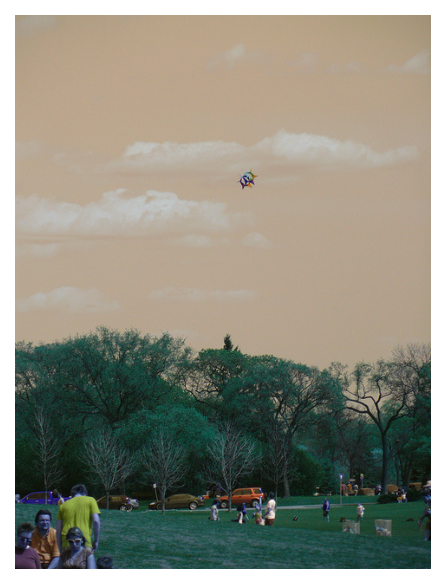

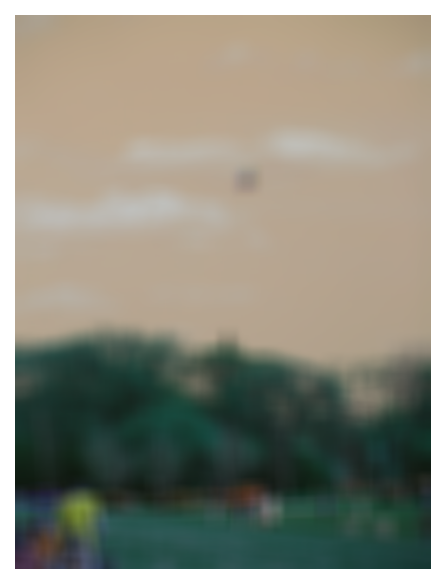

In [46]:
class kwcoco_cocodataset_wrapper(kwcoco.CocoDataset):
    def copy_dataset(self, dst):
        # copy json
        new_json_path = self.data_fpath

        # copy_img_root
        new_img_root = self.data_root

        return new_json_path, new_img_root
    
    def __preprocessing(self):
        return

    def preprocessing_imgData(self, func):
        return
    
    def preprocessing_crop_img(self):
        return
    
    def preprocessing_resize_img(self):
        return

def change_color(src_img:np.ndarray):
    res_img = cv2.blur(src_img, (25,25) )
    return res_img

coco_path = Path("../__datasets__/sample_coco_train2017/instances_train2017.json")
coco_img_root = Path("../__datasets__/sample_coco_train2017/")

coco = kwcoco_cocodataset_wrapper(data=coco_path, img_root=coco_img_root)

print(coco)

raw_img = coco.load_image(random.choice(list(coco.imgs.keys())))
show_img(raw_img)
res_img = change_color(raw_img)
show_img(res_img)



### データセットを読み込む

In [5]:
coco_path = Path("../__datasets__/sample_coco_train2017/instances_train2017.json")
coco_img_root = Path("../__datasets__/sample_coco_train2017/")

coco = kwcoco.CocoDataset(data=coco_path, img_root=coco_img_root)

print(coco)

<CocoDataset(tag=instances_train2017.json, n_anns=712, n_imgs=100, n_videos=0, n_cats=80)>


### 画像の前処理を行う

In [29]:
# 画像のサンプルIDを取得
sample_imgId = random.choice(list(coco.imgs.keys()))
print(f"image ID : {sample_imgId}")

coco_image = coco.coco_image(sample_imgId)
print(coco_image.wa)
print(coco_image.stats())
print(dir(coco_image))

coco.add_annotation()
coco.remove_annotation()
coco.add_image()
coco.add_images()

image ID : 188053
{'wh': (640, 478), 'n_chan': 'AttributeError("\'NoneType\' object has no attribute \'numel\'")', 'channels': None}
['__alias_to_aliases__', '__alias_to_primary__', '__class__', '__contains__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__json__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__nice__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_annot_segmentation', '_assets_key', '_bundle_dpath', '_detections_for_resolution', '_proxy', '_scalefactor_for_resolution', '_video', 'add_annotation', 'add_asset', 'add_auxiliary_item', 'annots', 'assets', 'bundle_dpath', 'channels', 'datetime', 'delay', 'detach', 'draw', 'dset', 'dsize', 'find_asset_obj', 'from_gid', 'get', 'imdelay', 'img', 'i

In [ ]:
# 前処理を行う関数
def preprocessing_img(src_img:np.ndarray):
    res_img = src_img
    return res_img



(0.5, 1.5)


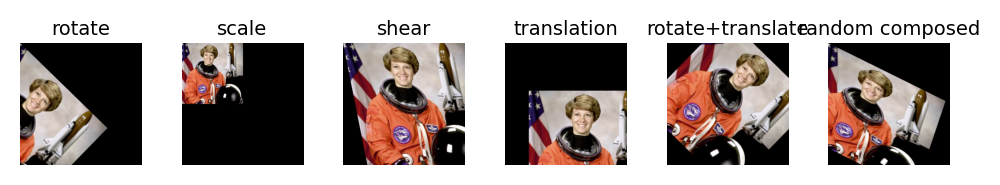

In [13]:
import kwimage
import math

image = kwimage.grab_test_image()
theta = 0.123 * math.tau
components = {
    'rotate': kwimage.Affine.affine(theta=theta),
    'scale': kwimage.Affine.affine(scale=0.5),
    'shear': kwimage.Affine.affine(shearx=0.2),
    'translation': kwimage.Affine.affine(offset=(100, 200)),
    'rotate+translate': kwimage.Affine.affine(theta=0.123 * math.tau, about=(256, 256)),
    'random composed': kwimage.Affine.random(scale=(0.5, 1.5), translate=(-20, 20), theta=(-theta, theta), shearx=(0, .4), rng=900558176210808600),
}

imgs = {}
for key, aff in components.items():
    imgs[key] = cv2.cvtColor(kwimage.warp_affine(image, aff), cv2.COLOR_BGR2RGB)


show_imgs(imgs)

In [25]:
from kwcoco.examples.simple_kwcoco_torch_dataset import *  # NOQA
import kwcoco
coco_dset = kwcoco.CocoDataset.demo('shapes8')
input_dims = (384, 384)


torch_dset = KWCocoSimpleTorchDataset(coco_dset, input_dims=input_dims)
print(dir(torch_dset))



[cacher] tryload fname=toy_dset_stamp_v020
[cacher] ... toy_dset_stamp_v020 cache hit
read dset_fpath = 'C:\\Users\\hirahara\\AppData\\Local\\kwcoco\\demodata_bundles\\shapes_8_iocrbdmcdmgxqk\\data.kwcoco.json'
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'antialias', 'augment', 'classes', 'coco_dset', 'gids', 'input_dims', 'rng']
